<a href="https://colab.research.google.com/github/beingshub02/Deep-Learning-Summer-School-IIITDM/blob/main/25DLS455_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1: Basics of CNNs – CIFAR-10 Classification

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 46ms/step - accuracy: 0.3741 - loss: 1.7135 - val_accuracy: 0.5822 - val_loss: 1.1890
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.5944 - loss: 1.1424 - val_accuracy: 0.6194 - val_loss: 1.0888
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.6574 - loss: 0.9861 - val_accuracy: 0.6537 - val_loss: 1.0207
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 54ms/step - accuracy: 0.6899 - loss: 0.8967 - val_accuracy: 0.6733 - val_loss: 0.9556
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7208 - loss: 0.8069 - val_accuracy: 0.6811 - val_loss: 0.9467
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7415 - loss: 0.7418 - val_accuracy: 0.6855 - val_loss: 0.9320
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.7637 - loss: 0.6780 - val_accuracy: 0.6925 - val_loss: 0.9381
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 55s 44ms/step - accuracy: 0.7812 -

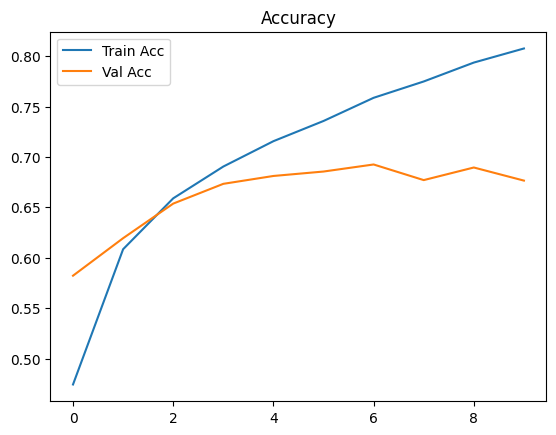

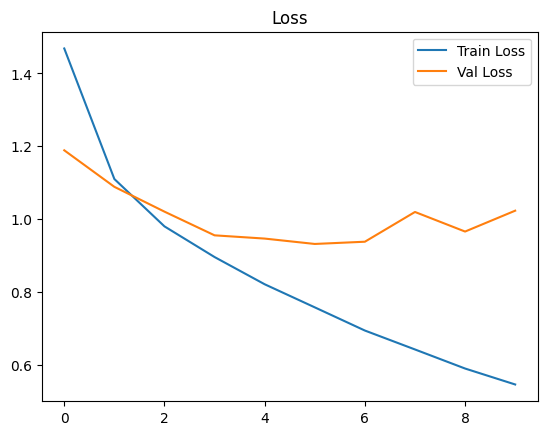

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy"); plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss"); plt.show()


Q2: Transfer Learning with Pre-trained CNNs

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 642s 510ms/step - accuracy: 0.4314 - loss: 1.6163 - val_accuracy: 0.5391 - val_loss: 1.3150
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 657s 490ms/step - accuracy: 0.5788 - loss: 1.2284 - val_accuracy: 0.5726 - val_loss: 1.2231
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 645s 509ms/step - accuracy: 0.5908 - loss: 1.1717 - val_accuracy: 0.5788 - val_loss: 1.1964
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 659s 528ms/step - accuracy: 0.6038 - loss: 1.1405 - val_accuracy: 0.5918 - val_loss: 1.1791
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 652s 522ms/step - accuracy: 0.6133 - loss: 1.0999 - val_accuracy: 0.5853 - val_loss: 1.1986
313/313 ━━━━━━━━━━━━━━━━━━━━ 128s 408ms/step


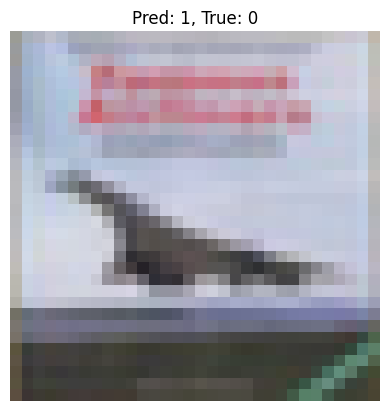

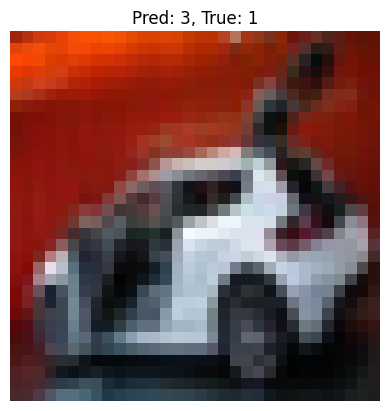

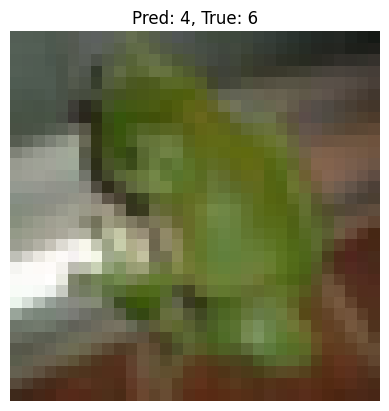

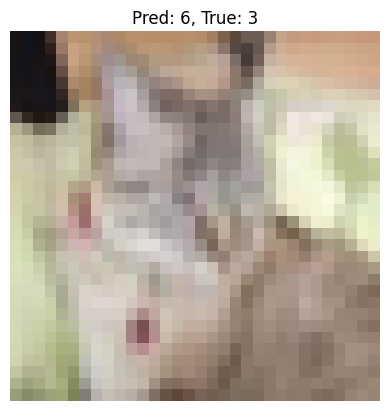

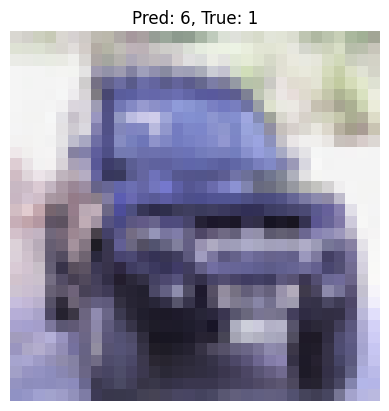

313/313 ━━━━━━━━━━━━━━━━━━━━ 127s 405ms/step - accuracy: 0.5770 - loss: 1.2109
Test accuracy with VGG16: 0.5813000202178955


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import numpy as np

# Preprocess input
base_model = VGG16(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
base_model.trainable = False

# Custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train only top layers
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluate and predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
misclassified_indices = np.where(y_pred_classes.reshape(-1) != y_test.reshape(-1))[0]

# Show 5 misclassified images
for i in range(5):
    idx = misclassified_indices[i]
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {y_pred_classes[idx]}, True: {y_test[idx][0]}")
    plt.axis('off')
    plt.show()

print("Test accuracy with VGG16:", model.evaluate(x_test, y_test)[1])


Q3: RNNs – Character-Level Text Generation

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.0380
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.0159
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2.9997
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.9844
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.9660
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2.9464
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.8981
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.8593
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 2.8117
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.8028
Generated text:
 Deep learning and n                                                                                                    


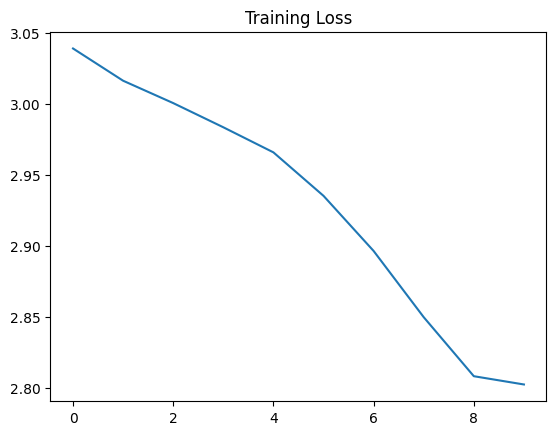

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Sample text
text = "Deep learning and neural networks are changing the future of artificial intelligence."

# Tokenization
chars = sorted(list(set(text)))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for i, c in enumerate(chars)}

seq_length = 20
step = 1
sequences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sequences.append(text[i:i + seq_length])
    next_chars.append(text[i + seq_length])

X = np.zeros((len(sequences), seq_length, len(chars)))
y = np.zeros((len(sequences), len(chars)))

for i, seq in enumerate(sequences):
    for j, char in enumerate(seq):
        X[i, j, char2idx[char]] = 1
    y[i, char2idx[next_chars[i]]] = 1

# LSTM Model
model = Sequential([
    LSTM(128, input_shape=(seq_length, len(chars))),
    Dense(len(chars), activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam')
history = model.fit(X, y, epochs=10)

# Generate text
seed = "Deep learning and n"
generated = seed
for _ in range(100):
    x_pred = np.zeros((1, seq_length, len(chars)))
    for t, char in enumerate(seed):
        x_pred[0, t, char2idx[char]] = 1
    pred = model.predict(x_pred, verbose=0)[0]
    next_index = np.argmax(pred)
    next_char = idx2char[next_index]
    generated += next_char
    seed = seed[1:] + next_char

print("Generated text:\n", generated)

# Plot training loss
plt.plot(history.history['loss'])
plt.title("Training Loss")
plt.show()


Q4: Transformers – Text Summarization or Translation

In [5]:
from transformers import pipeline

# Summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

long_texts = [
    """The Indian Space Research Organisation (ISRO) launched Chandrayaan-3 in 2023, aiming to achieve a soft landing on the moon.
    The mission was a significant step in demonstrating India's capability in planetary exploration.
    Chandrayaan-3 successfully landed, making India the fourth country to accomplish this feat.""",
    """Climate change is one of the most pressing challenges today. Rising temperatures, melting glaciers, and sea level rise threaten ecosystems and human settlements.
    Coordinated global action is essential to mitigate its effects and transition to renewable energy sources.""",
    """The global tech industry is undergoing rapid transformation, driven by innovations in AI, quantum computing, and 5G connectivity.
    These advances are reshaping industries from healthcare to transportation, creating new opportunities and challenges."""
]

for text in long_texts:
    summary = summarizer(text, max_length=50, min_length=20, do_sample=False)[0]['summary_text']
    print("\nOriginal:\n", text)
    print("\nSummary:\n", summary)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu



Original:
 The Indian Space Research Organisation (ISRO) launched Chandrayaan-3 in 2023, aiming to achieve a soft landing on the moon. 
    The mission was a significant step in demonstrating India's capability in planetary exploration. 
    Chandrayaan-3 successfully landed, making India the fourth country to accomplish this feat.

Summary:
 Chandrayaan-3 is India's third mission to the moon. It is the first time a moon landing has been achieved by a nation.


Your max_length is set to 50, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)



Original:
 Climate change is one of the most pressing challenges today. Rising temperatures, melting glaciers, and sea level rise threaten ecosystems and human settlements. 
    Coordinated global action is essential to mitigate its effects and transition to renewable energy sources.

Summary:
 Rising temperatures, melting glaciers and sea level rise threaten ecosystems and human settlements. Coordinated global action is essential to mitigate its effects and transition to renewable energy sources.

Original:
 The global tech industry is undergoing rapid transformation, driven by innovations in AI, quantum computing, and 5G connectivity. 
    These advances are reshaping industries from healthcare to transportation, creating new opportunities and challenges.

Summary:
 The tech industry is undergoing rapid transformation, driven by innovations in AI, quantum computing, and 5G connectivity. These advances are reshaping industries from healthcare to transportation, creating new opportuni

Q5: Autoencoders – Representation Learning

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 150ms/step - loss: 0.3234 - val_loss: 0.0953
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 155ms/step - loss: 0.0912 - val_loss: 0.0861
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 154ms/step - loss: 0.0842 - val_loss: 0.0822
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 151ms/step - loss: 0.0807 - val_loss: 0.0800
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 153ms/step - loss: 0.0788 - val_loss: 0.0782
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 157ms/step - loss: 0.0773 - val_loss: 0.0772
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - loss: 0.0762 - val_loss: 0.0764
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 156ms/step - loss: 0.0754 - val_loss: 0.0757
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 151ms/step - loss: 0.0750 - val_loss: 0.0753
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 161ms/step - loss: 0.0746 - val_loss: 0.0751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


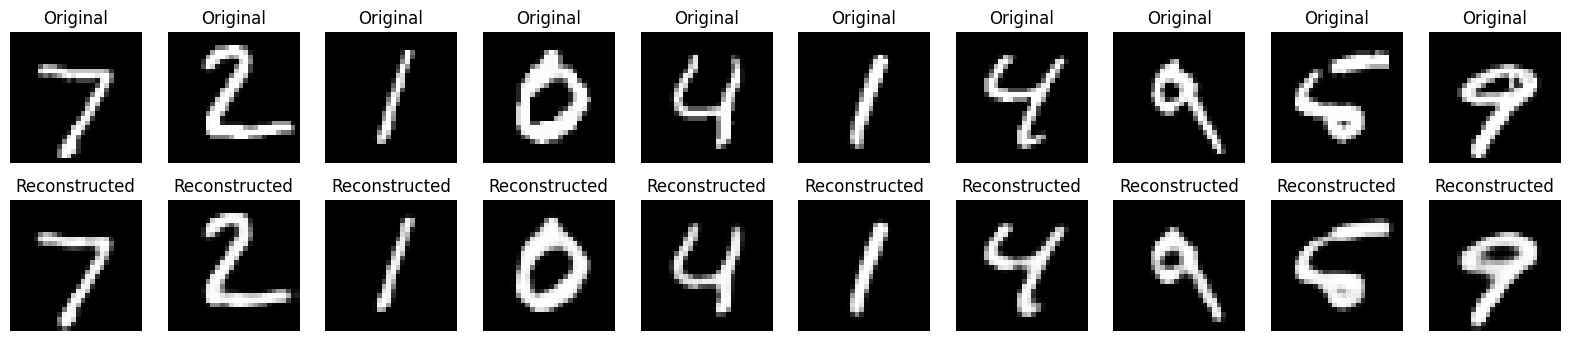

Bottleneck (encoded) shape: (None, 7, 7, 8)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load and preprocess MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_split=0.2)

# Predict
decoded_imgs = autoencoder.predict(x_test[:10])

# Display original vs reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

# Show bottleneck shape
print("Bottleneck (encoded) shape:", encoded.shape)
